In [37]:
def load_dataset(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            x, y = map(float, line.strip().split())
            data.append([x, y])
    return data

Data = load_dataset('dataset.txt')

In [38]:
import random

def initialize_centers(data, k, seed):
    random.seed(seed)
    centers = random.sample(data, k)
    return centers
K = 4  # K = 2, 4, 6, 7
seed = 112230359
Centers = initialize_centers(Data, K, seed)

In [39]:
import math

def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def assign_clusters(data, centers):
    clusters = [[] for _ in range(len(centers))]
    for point in data:
        distances = [euclidean_distance(point, center) for center in centers]
        closest_center_index = distances.index(min(distances))
        clusters[closest_center_index].append(point)
    return clusters

Clusters = assign_clusters(Data, Centers)

In [40]:
import math

def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def assign_clusters(data, centers):
    clusters = [[] for _ in range(len(centers))]
    for point in data:
        distances = [euclidean_distance(point, center) for center in centers]
        closest_center_index = distances.index(min(distances))
        clusters[closest_center_index].append(point)
    return clusters

Clusters = assign_clusters(Data, Centers)

In [41]:
def update_centers(clusters):
    new_centers = []
    for cluster in clusters:
        if cluster:
            x_mean = sum(point[0] for point in cluster) / len(cluster)
            y_mean = sum(point[1] for point in cluster) / len(cluster)
            new_centers.append([x_mean, y_mean])
        else:
            new_centers.append([0, 0]) 
    return new_centers

new_Centers = update_centers(Clusters)

In [42]:
def kmeans(data, k, seed, max_iterations=100, shift_threshold=50):
    centers = initialize_centers(data, k, seed)
    for iteration in range(max_iterations):
        clusters = assign_clusters(data, centers)
        new_centers = update_centers(clusters)
        
        shift = 0
        for i in range(len(centers)):
            if euclidean_distance(centers[i], new_centers[i]) > 1e-5:
                shift += 1
        
        if shift < shift_threshold:
            break
        
        centers = new_centers
    
    return clusters, centers

Clusters, Centers = kmeans(Data, K, seed)

In [43]:
def calculate_inertia(clusters, centers):
    inertia = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            inertia += euclidean_distance(point, centers[i]) ** 2
    return inertia

inertia = calculate_inertia(Clusters, Centers)
print(f"Inertia for K={K}: {inertia}")

Inertia for K=4: 40.07847231756602


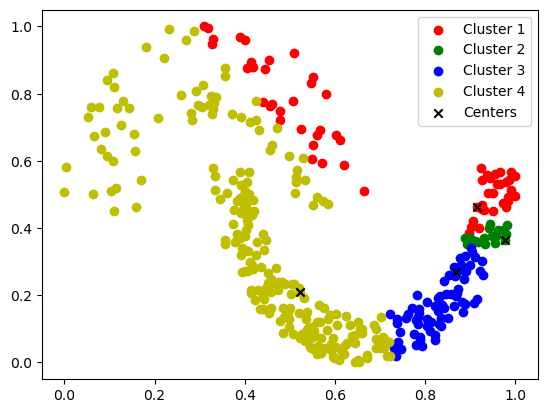

In [44]:
import matplotlib.pyplot as plt

def plot_clusters(clusters, centers):
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k'] 
    for i, cluster in enumerate(clusters):
        x = [point[0] for point in cluster]
        y = [point[1] for point in cluster]
        plt.scatter(x, y, color=colors[i], label=f'Cluster {i+1}')
    
    # Plot centers
    x_centers = [center[0] for center in centers]
    y_centers = [center[1] for center in centers]
    plt.scatter(x_centers, y_centers, color='black', marker='x', label='Centers')
    
    plt.legend()
    plt.show()

plot_clusters(Clusters, Centers)

Inertia for K=2: 88.71410144827314


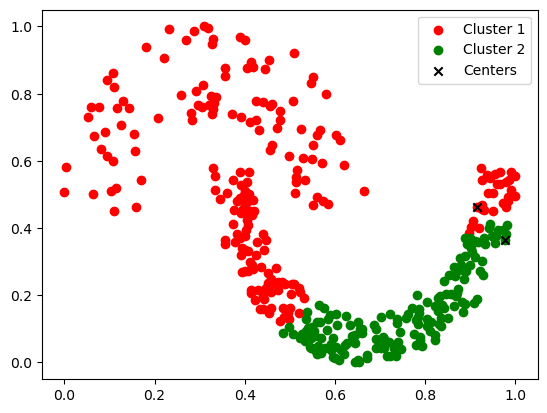

Inertia for K=4: 40.07847231756602


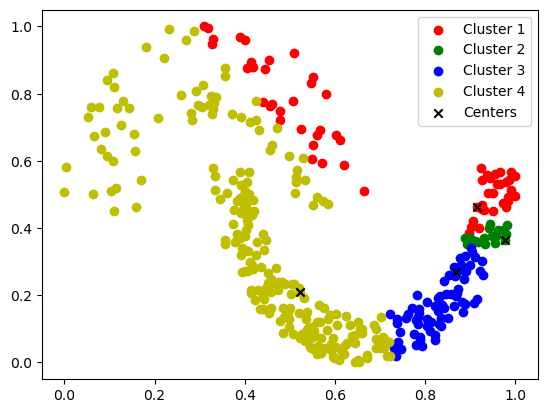

Inertia for K=6: 38.29791913571205


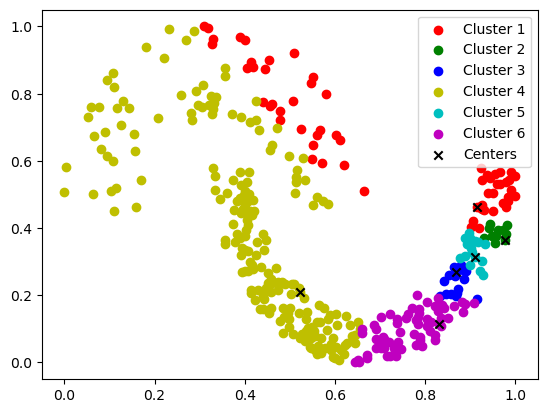

Inertia for K=7: 14.769753351704686


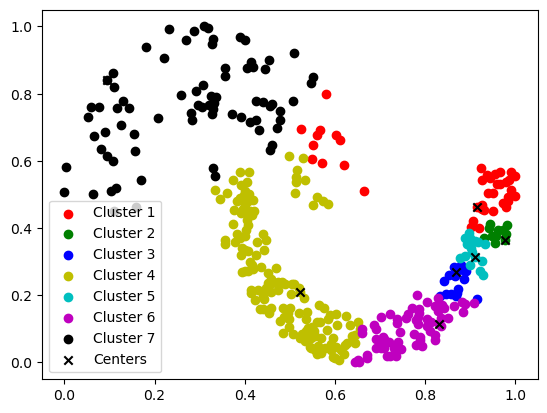

Inertia for K=2: 88.71410144827314
Inertia for K=4: 40.07847231756602
Inertia for K=6: 38.29791913571205
Inertia for K=7: 14.769753351704686


In [45]:
for K in [2, 4, 6, 7]:
    Clusters, Centers = kmeans(Data, K, seed)
    inertia = calculate_inertia(Clusters, Centers)
    print(f"Inertia for K={K}: {inertia}")
    plot_clusters(Clusters, Centers)
for K in [2, 4, 6, 7]:
    Clusters, Centers = kmeans(Data, K, seed)
    inertia = calculate_inertia(Clusters, Centers)
    print(f"Inertia for K={K}: {inertia}")